In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

In [9]:
# Load the saved model
model_path = 'model_best.keras'
model_best = tf.keras.models.load_model(model_path)

# Set image properties for inference
img_height = 128
img_width = 128

# Define a function to preprocess the input image
def preprocess_image(img_path, target_size=(img_height, img_width)):
    # Load the image
    img = image.load_img(img_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    
    # Rescale the image (same as the training augmentation)
    img_array = img_array / 255.0
    
    # Add an extra dimension for batch size (model expects a batch of images)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array

# Define a function to predict the class of an image
def predict_image_class(img_path):
    # Preprocess the image
    img_array = preprocess_image(img_path)
    
    # Make predictions
    predictions = model_best.predict(img_array)
    
    # Get the predicted class (since this is binary classification, we use argmax)
    predicted_class = np.argmax(predictions, axis=1)
    
    # Return the predicted class (0 or 1) and prediction probabilities
    return predicted_class[0], predictions[0]

# Define a function to map the predicted class to a human-readable label
def map_class_to_label(predicted_class):
    if predicted_class == 0:
        return "AI Generated Image"
    elif predicted_class == 1:
        return "Real Image"
    else:
        return "Unknown"

# Display an image and make predictions
def display_and_predict(img_path):
    # Load and display the image
    img = image.load_img(img_path, target_size=(img_height, img_width))
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
    
    # Get predictions
    predicted_class, predictions = predict_image_class(img_path)
    
    # Map the class to a human-readable label
    class_label = map_class_to_label(predicted_class)
    
    # Display the result
    print(f'Predicted class for {img_path}: {class_label}')
    print(f'Prediction probabilities: {predictions}')


In [10]:
# Predict on multiple images in a folder
def predict_on_folder(folder_path):
    # List all files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    
    # Loop through each image and predict
    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        print(f"\nProcessing image: {img_file}")
        display_and_predict(img_path)

In [11]:
test_folder_path = 'inference'


Processing image: AI4.jpeg


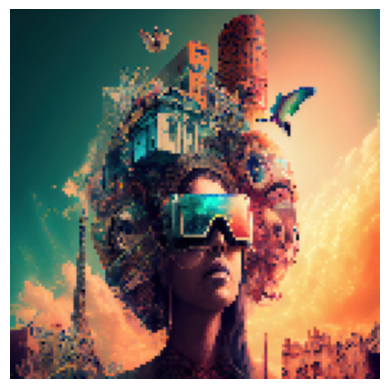

1/1 [==============================] - 0s 41ms/step
Predicted class for inference/AI4.jpeg: AI Generated Image
Prediction probabilities: [0.89692    0.10307997]

Processing image: AI1.jpg


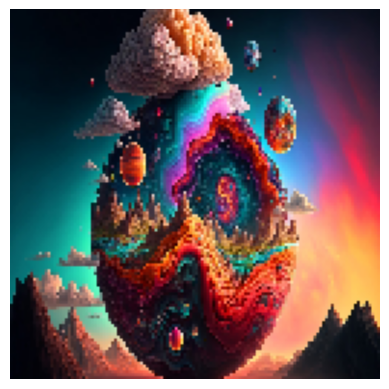

1/1 [==============================] - 0s 10ms/step
Predicted class for inference/AI1.jpg: AI Generated Image
Prediction probabilities: [0.91741765 0.08258243]

Processing image: REAL2.png


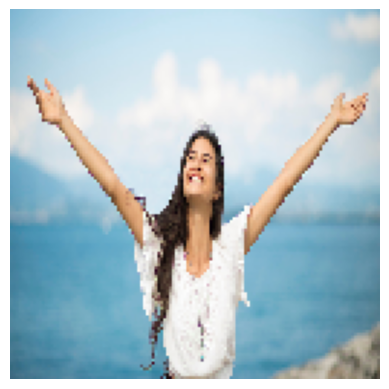

1/1 [==============================] - 0s 10ms/step
Predicted class for inference/REAL2.png: Real Image
Prediction probabilities: [0.33969796 0.66030204]

Processing image: REAL3.jpg


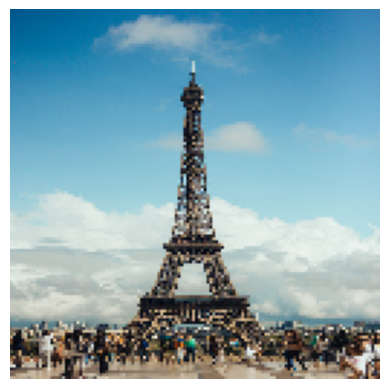

1/1 [==============================] - 0s 10ms/step
Predicted class for inference/REAL3.jpg: Real Image
Prediction probabilities: [0.4032606 0.5967394]

Processing image: AI2.jpeg


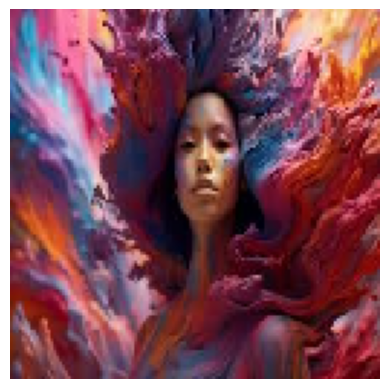

1/1 [==============================] - 0s 11ms/step
Predicted class for inference/AI2.jpeg: AI Generated Image
Prediction probabilities: [0.94265634 0.05734366]


In [12]:
predict_on_folder(test_folder_path)